In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

In [3]:
tickerSymbol = 'HINDALCO.NS'
tickerData = yf.Ticker(tickerSymbol)
tickerDF = tickerData.history(period='1d', start='2010-5-22', end='2024-6-23')

In [4]:
df = tickerDF

In [5]:
import matplotlib.pyplot as plt


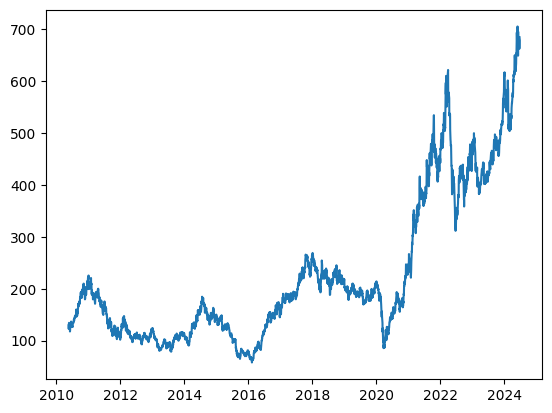

In [6]:
plt.plot(df.index, df['Close'])

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

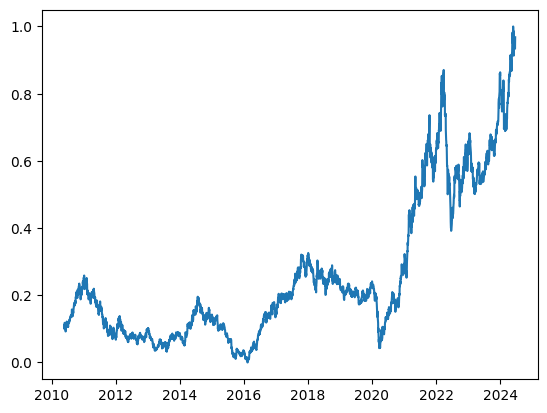

In [8]:
plt.plot(df.index, scaled_data)

In [9]:
training_size = int (len(scaled_data) * 0.90)
test_size = len(scaled_data) - training_size
training_size, test_size = scaled_data[0:training_size,:], scaled_data[training_size:len(scaled_data),:]

In [10]:
training_size.size, test_size.size

(3127, 348)

In [11]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [12]:
time_step = 100
X_train, y_train = create_dataset(training_size, time_step)
X_test, y_test = create_dataset(test_size, time_step)

In [13]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [18]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(100, 1)))
model.add(Dropout(0.2))  # Adding dropout regularization
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))  # Adding dropout regularization
model.add(LSTM(100))
model.add(Dropout(0.2))  # Adding dropout regularization
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
95/95 [==============================] - 33s 269ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 2/100
95/95 [==============================] - 24s 255ms/step - loss: 0.0010 - val_loss: 0.0039
Epoch 3/100
95/95 [==============================] - 24s 258ms/step - loss: 8.6121e-04 - val_loss: 0.0033
Epoch 4/100
95/95 [==============================] - 24s 249ms/step - loss: 9.4063e-04 - val_loss: 0.0013
Epoch 5/100
95/95 [==============================] - 25s 260ms/step - loss: 8.3945e-04 - val_loss: 0.0023
Epoch 6/100
95/95 [==============================] - 24s 254ms/step - loss: 7.1710e-04 - val_loss: 0.0013
Epoch 7/100
95/95 [==============================] - 26s 271ms/step - loss: 7.2237e-04 - val_loss: 0.0018
Epoch 8/100
95/95 [==============================] - 22s 237ms/step - loss: 6.3402e-04 - val_loss: 8.3648e-04
Epoch 9/100
95/95 [==============================] - 24s 252ms/step - loss: 7.1679e-04 - val_loss: 9.7381e-04
Epoch 10/100
95/95 [==========================

In [20]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

8/8 [==============================] - 1s 71ms/step


In [21]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [22]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


223.55496297990933

In [23]:
math.sqrt(mean_squared_error(y_test,test_predict))

517.1697966381627

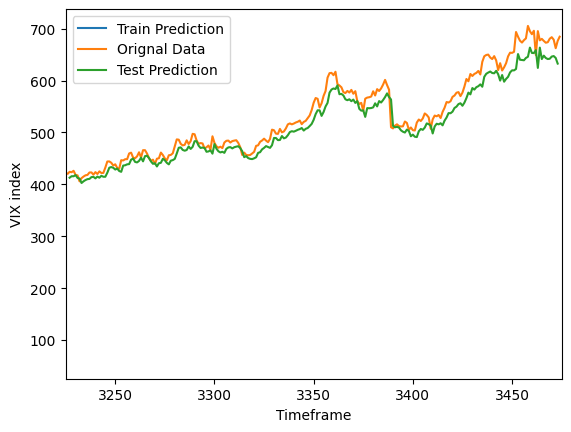

In [24]:
look_back = 100
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(scaled_data)-1, :] = test_predict

plt.plot(trainPredictPlot, label = "Train Prediction")
plt.plot(scaler.inverse_transform(scaled_data), label = "Orignal Data")
plt.plot(testPredictPlot, label = "Test Prediction")


plt.xlim(len(scaled_data) - 250, len(scaled_data))
plt.xlabel('Timeframe')
plt.ylabel('VIX index')
plt.legend()
plt.show()


<ipython-input-26-8ec280c06f3c>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


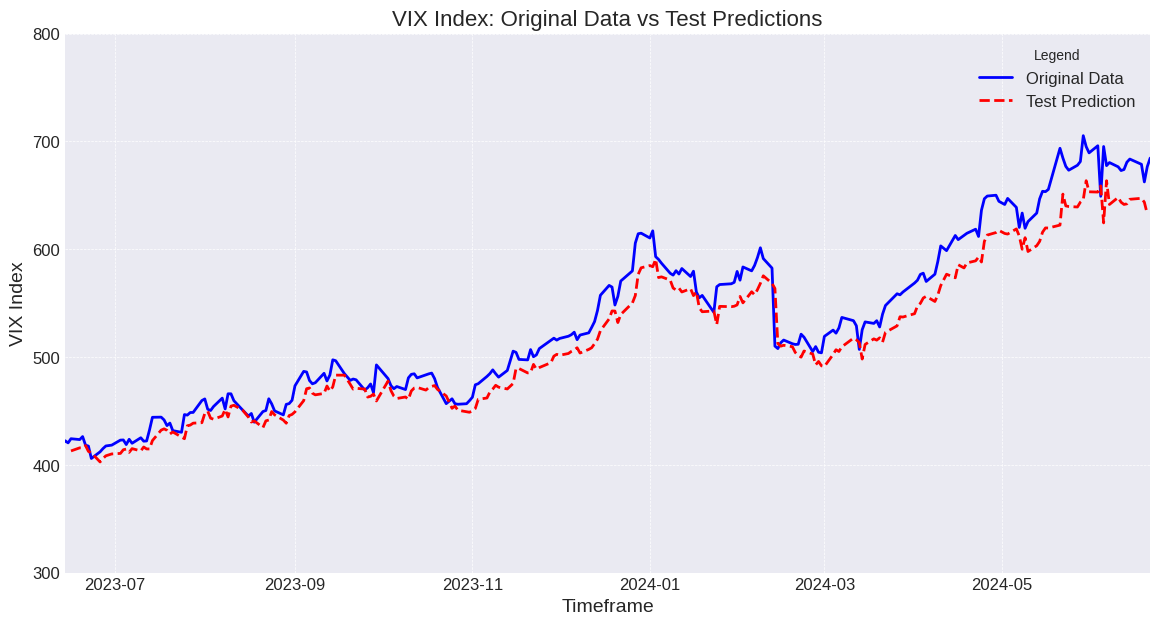

In [26]:
# Set the style to a more visually appealing one
plt.style.use('seaborn-darkgrid')

# Create the plot with a larger figure size
plt.figure(figsize=(14, 7))

# Plot the original data (after inverse transforming the scaled data)
plt.plot(df.index, scaler.inverse_transform(scaled_data), label="Original Data", color='blue', linestyle='-', linewidth=2)

# Plot the test predictions
plt.plot(df.index[-len(testPredictPlot):], testPredictPlot, label="Test Prediction", color='red', linestyle='--', linewidth=2)


# Add titles and labels with more descriptive text
plt.title('VIX Index: Original Data vs Test Predictions', fontsize=16)
plt.xlabel('Timeframe', fontsize=14)
plt.ylabel('VIX Index', fontsize=14)

# Add a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a legend with a more descriptive title
plt.legend(title='Legend', fontsize=12)

# Customize the tick parameters for better readability
plt.tick_params(axis='both', which='major', labelsize=12)


# Set the x-axis and y-axis limits to show the last 250 points
plt.xlim(df.index[-250], df.index[-1])
plt.ylim(300, 800)
# Display the plot
plt.show()


In [32]:
def prediction(first100daysdata, futuredays):
    # Reshape the input data to match the LSTM model input shape
    first100daysdata = np.array(first100daysdata)
    first100daysdata = first100daysdata.reshape(1, 100, 1)

    # Initialize an empty list to store predictions
    predictions = []

    # Loop through each future day to predict
    for i in range(futuredays):
        # Predict the next day using the model
        pred = model.predict(first100daysdata)

        # Append the prediction to the list of predictions
        predictions.append(pred[0, 0])  # Assuming the prediction is a single value

        # Update first100daysdata to include the new prediction
        first100daysdata = np.append(first100daysdata[:, 1:, :], pred.reshape(1, 1, 1), axis=1)

    # Inverse transform the predictions
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    return predictions

# Example usage:
daystopredict = 7
predicted_values = prediction(scaled_data[-100-daystopredict:-daystopredict], daystopredict)
print(predicted_values)



1/1 [==============================] - 0s 58ms/step
[[641.51105]
 [618.819  ]
 [605.00867]
 [594.10455]
 [583.985  ]
 [573.9946 ]
 [564.0123 ]]


<ipython-input-34-1a9bcecc7b02>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


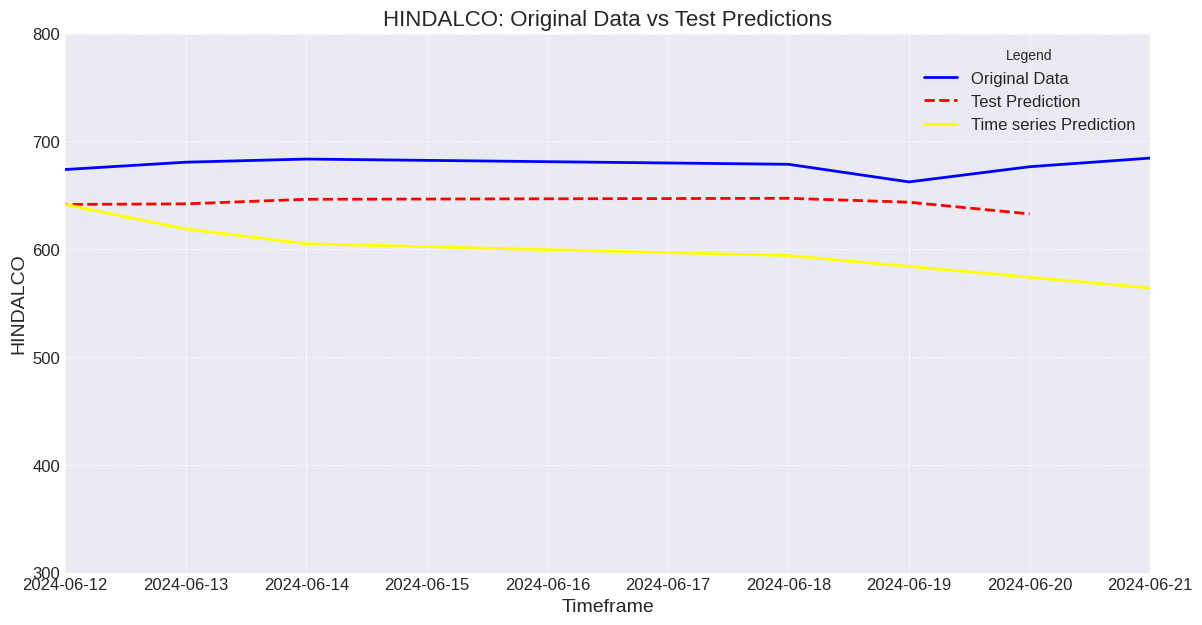

In [34]:
# Set the style to a more visually appealing one
plt.style.use('seaborn-darkgrid')

# Create the plot with a larger figure size
plt.figure(figsize=(14, 7))

# Plot the original data (after inverse transforming the scaled data)
plt.plot(df.index, scaler.inverse_transform(scaled_data), label="Original Data", color='blue', linestyle='-', linewidth=2)

# Plot the test predictions
plt.plot(df.index[-len(testPredictPlot):], testPredictPlot, label="Test Prediction", color='red', linestyle='--', linewidth=2)
plt.plot(df.index[-len(predicted_values):], predicted_values, label="Time series Prediction", color='yellow', linestyle='-', linewidth=2)


# Add titles and labels with more descriptive text
plt.title('HINDALCO: Original Data vs Test Predictions', fontsize=16)
plt.xlabel('Timeframe', fontsize=14)
plt.ylabel('HINDALCO', fontsize=14)

# Add a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a legend with a more descriptive title
plt.legend(title='Legend', fontsize=12)

# Customize the tick parameters for better readability
plt.tick_params(axis='both', which='major', labelsize=12)


# Set the x-axis and y-axis limits to show the last 250 points
#plt.xlim(df.index[-len(predicted_values)], df.index[-1])
plt.xlim(df.index[-7], df.index[-1])
plt.ylim(300, 800)
# Display the plot
plt.show()
